© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**[Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, 5, 21](https://www.nature.com/articles/s43586-025-00392-0)**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

**Free access to a view-only version**: [https://WaLSA.tools/nrmp](https://WaLSA.tools/nrmp)

**Supplementary Information**: [https://WaLSA.tools/nrmp-si](https://WaLSA.tools/nrmp-si)

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [1]:
import numpy as np # type: ignore
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools, WaLSA_detrend_apod # type: ignore
import warnings
#--------------------------------------------------------------------------

warnings.filterwarnings('ignore', category=RuntimeWarning)

# Load the synthetic signal from the FITS file
data_dir= 'Synthetic_Data/'
file_path = data_dir + 'NRMP_signal_1D.fits'
hdul = fits.open(file_path)
signal = hdul[0].data  # 1D synthetic signal data
time = hdul[1].data  # Time array saved in the second HDU (Extension HDU 1)
hdul.close()

# Sampling rate and duration of the data
sampling_rate = 100  # Hz
duration = 10        # seconds

#--------------------------------------------------------------------------
# Create unevenly sampled data by removing gaps from the signal
# Define gaps' sizes and start indices
gap_sizes = [17, 42, 95, 46]  # Sizes of gaps
gap_starts = [150, 200, 500, 800]  # Start indices for gaps
# Create initial set of indices
n_points = len(signal)
indices = np.arange(n_points)
# Remove gaps
for gap_start, gap_size in zip(gap_starts, gap_sizes):
    indices = indices[(indices < gap_start) | (indices >= gap_start + gap_size)]
# Reduce both time and signal arrays according to final indices
t_uneven = time[indices]
signal_uneven = signal[indices]
# Sort time and signal to maintain ascending order (although should already be in order)
sorted_indices = np.argsort(t_uneven)
t_uneven = t_uneven[sorted_indices]
signal_uneven = signal_uneven[sorted_indices]
#--------------------------------------------------------------------------
# FFT Analysis using WaLSAtools
fft_power, fft_freqs, fft_significance, _ = WaLSAtools(signal=signal, time=time, method='fft', siglevel=0.95, apod=0.1)
# Normalize FFT power to its maximum value
fft_power_normalized = 100 * fft_power / np.max(fft_power)
fft_significance_normalized = 100 * fft_significance / np.max(fft_power)
#--------------------------------------------------------------------------
# Lomb-Scargle Analysis using WaLSAtools
ls_power, ls_freqs, ls_significance = WaLSAtools(signal=signal, time=time, method='lombscargle', siglevel=0.95, apod=0.1)
# Normalize Lomb-Scargle power to its maximum value
ls_power_normalized = 100 * ls_power / np.max(ls_power)
ls_significance_normalized = 100 * ls_significance / np.max(ls_power)
#--------------------------------------------------------------------------
# Wavelet Analysis using WaLSAtools - Morlet
wavelet_power_morlet, wavelet_periods_morlet, wavelet_significance_morlet, coi_morlet, global_power_morlet, global_conf_morlet, rgws_morlet_power = WaLSAtools(
    signal=signal, time=time, method='wavelet', siglevel=0.95, apod=0.1, mother='morlet', GWS=True, RGWS=True
)
#--------------------------------------------------------------------------
# Wavelet Analysis using WaLSAtools - DOG (Mexican Hat)
wavelet_power_dog, wavelet_periods_dog, wavelet_significance_dog, coi_dog, global_power_dog, global_conf_dog, rgws_dog_power = WaLSAtools(
    signal=signal, time=time, method='wavelet', siglevel=0.95, apod=0.1, mother='dog', GWS=True, RGWS=True
)
#--------------------------------------------------------------------------
# Wavelet Analysis using WaLSAtools - Paul
wavelet_power_paul, wavelet_periods_paul, wavelet_significance_paul, coi_paul, global_power_paul, global_conf_paul, rgws_paul_power = WaLSAtools(
    signal=signal, time=time, method='wavelet', siglevel=0.95, apod=0.1, mother='paul', GWS=True, RGWS=True
)
#--------------------------------------------------------------------------
# Welch Power Spectral Density Analysis using WaLSAtools
welch_psd, welch_freqs, welch_significance = WaLSAtools(signal=signal, time=time, method='welch', siglevel=0.95, nperseg=200, noverlap=20)
# Normalize Welch PSD to its maximum value
welch_psd_normalized = 100 * welch_psd / np.max(welch_psd)
welch_significance_normalized = 100 * welch_significance / np.max(welch_psd)
#--------------------------------------------------------------------------
# EMD & HHT Calculations using WaLSAtools
HHT_power_spectrum_EMD, HHT_significance_level_EMD, HHT_freq_bins_EMD, psd_spectra_fft_EMD, confidence_levels_fft_EMD, _, _, _ = WaLSAtools(
    signal=signal, time=time, method='emd', siglevel=0.95)
# Normalize power spectra to their maximum values
HHT_power_spectrum_EMD_normalized = 100 * HHT_power_spectrum_EMD / np.max(HHT_power_spectrum_EMD)
HHT_significance_level_EMD_normalized = 100 * HHT_significance_level_EMD / np.max(HHT_power_spectrum_EMD)
#--------------------------------------------------------------------------
# EEMD & HHT Calculations using WaLSAtools
HHT_power_spectrum_EEMD, HHT_significance_level_EEMD, HHT_freq_bins_EEMD, psd_spectra_fft_EEMD, confidence_levels_fft_EEMD, _, _, _ = WaLSAtools(
    signal=signal, time=time, method='emd', siglevel=0.95, EEMD=True)
# Normalize power spectra to their maximum values
HHT_power_spectrum_EEMD_normalized = 100 * HHT_power_spectrum_EEMD / np.max(HHT_power_spectrum_EEMD)
HHT_significance_level_EEMD_normalized = 100 * HHT_significance_level_EEMD / np.max(HHT_power_spectrum_EEMD)


Detrending and apodization complete.
FFT processed.
Detrending and apodization complete.
Lomb-Scargle processed.
Detrending and apodization complete.
Wavelet (morlet) processed.
Detrending and apodization complete.
Wavelet (dog) processed.
Detrending and apodization complete.
Wavelet (paul) processed.
Welch processed.
Detrending and apodization complete.
EMD processed.
Detrending and apodization complete.
EEMD processed.


GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/Fig3_power_spectra_1D_signal.pdf'


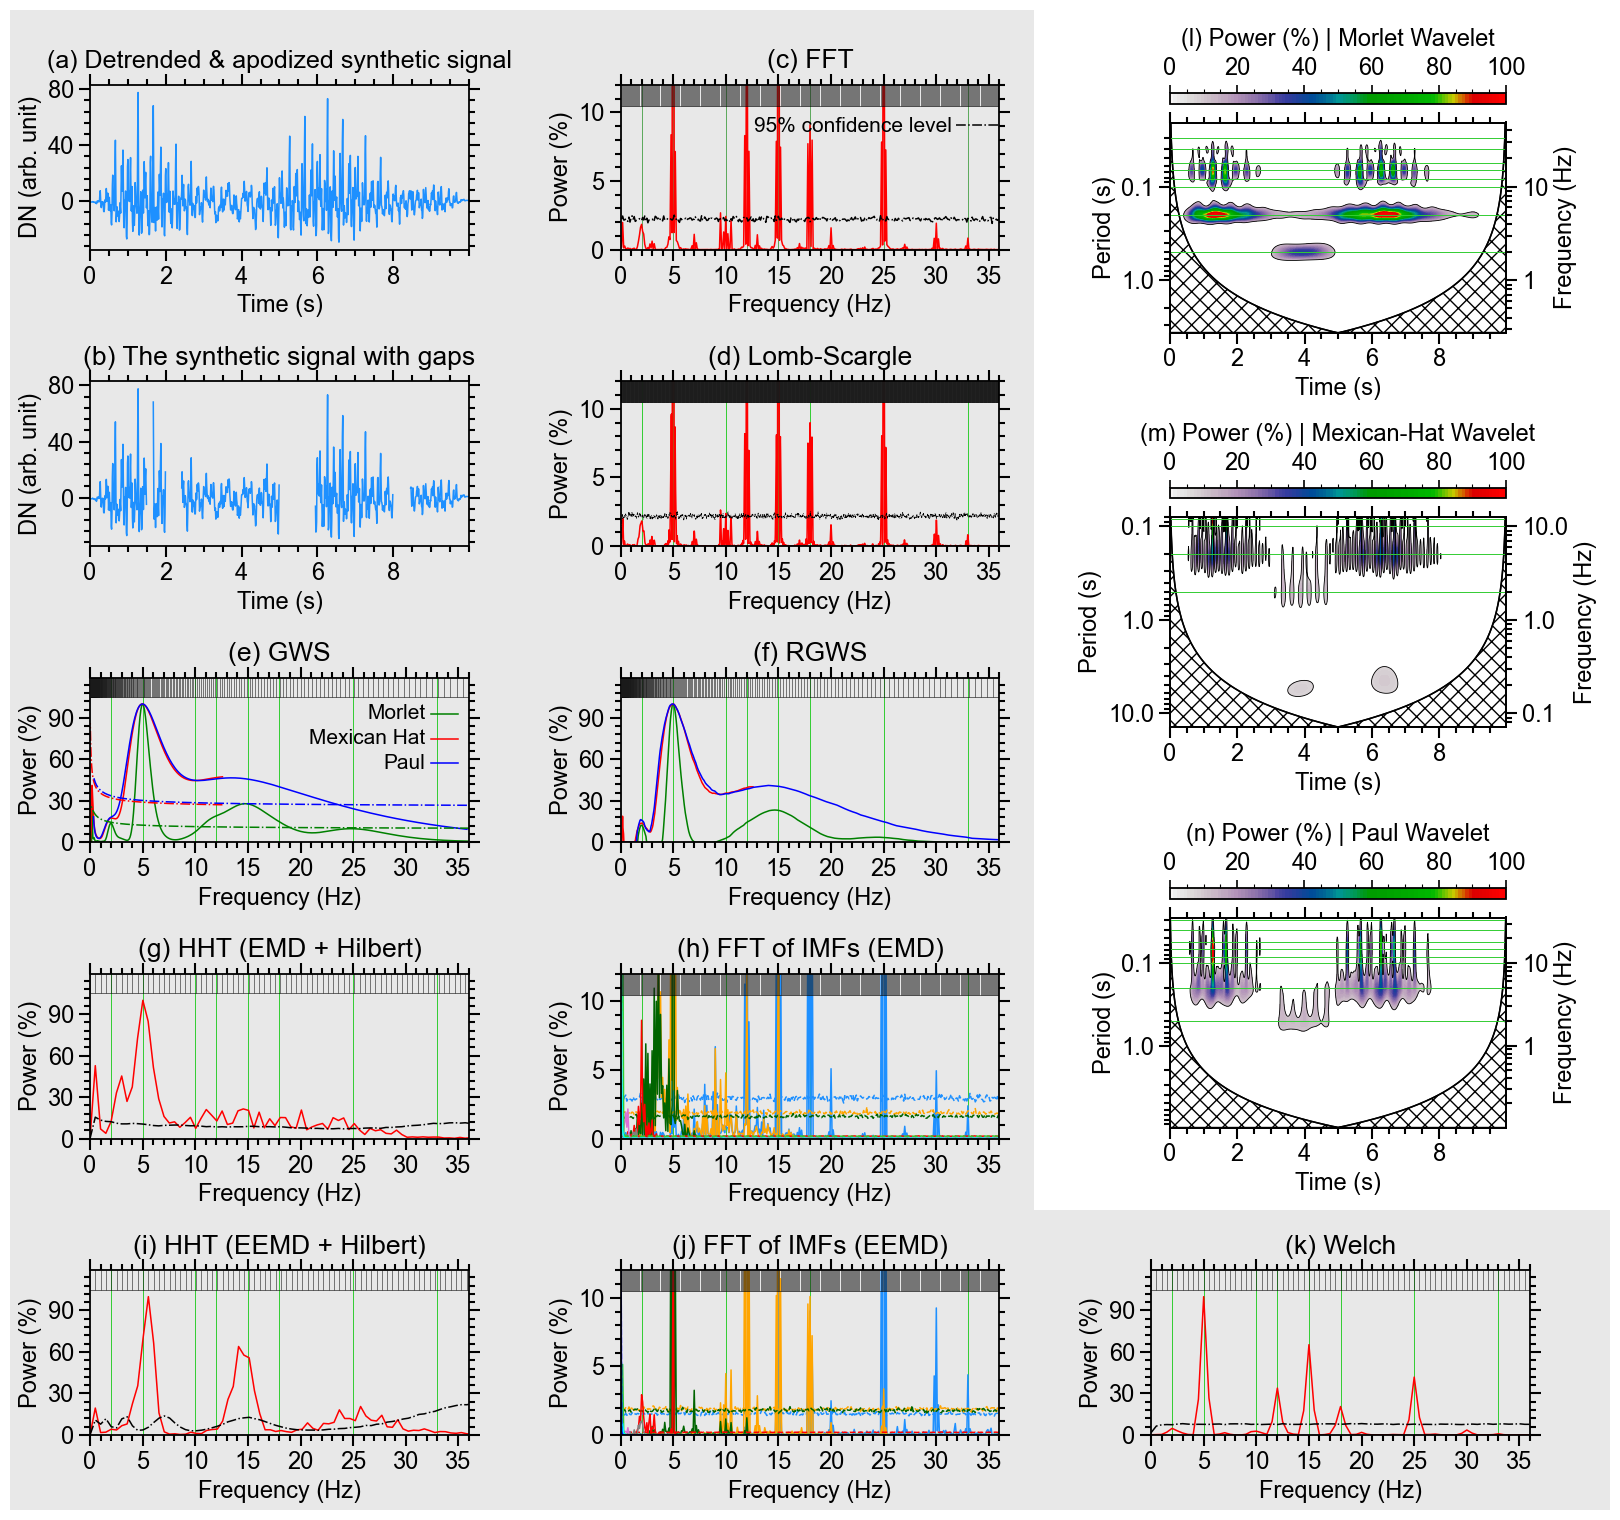

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib import gridspec # type: ignore
from matplotlib.patches import Polygon # type: ignore
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter # type: ignore
from matplotlib.legend_handler import HandlerTuple # type: ignore
from mpl_toolkits.axes_grid1 import make_axes_locatable # type: ignore
from WaLSAtools import WaLSA_save_pdf # type: ignore
from matplotlib.colors import ListedColormap # type: ignore

#--------------------------------------------------------------------------
pre_defined_freq = [2,5,10,12,15,18,25,33] # Mark pre-defined frequencies

# Setting global parameters
plt.rcParams.update({
    'font.family': 'sans-serif',     # Use sans-serif fonts
    'font.sans-serif': 'Arial',   # Set Helvetica as the default sans-serif font
    'font.size': 19,          # Global font size
    'axes.titlesize': 19,     # Title font size
    'axes.labelsize': 17,     # Axis label font size
    'xtick.labelsize': 17,    # X-axis tick label font size
    'ytick.labelsize': 17,    # Y-axis tick label font size
    'legend.fontsize': 15,    # Legend font size
    'figure.titlesize': 19,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
    'font.weight': 'medium',      # Make all fonts bold
    'axes.titleweight': 'medium', # Make title font bold
    'axes.labelweight': 'medium' # Make axis labels bold
})

plt.rc('axes', linewidth=1.3)
plt.rc('lines', linewidth=1.1)

# Create a figure and a gridspec with customized layout
fig = plt.figure(figsize=(16, 15))
gs = gridspec.GridSpec(5, 3, height_ratios=[1, 1, 1, 1, 1], width_ratios=[1, 1, 1], figure=fig, wspace=0.4, hspace=0.8)

# Add the light gray background manually using Polygons
# Fill for first two columns (all rows)
polygon_coords_1 = [[0.0, 0.0], [0.64, 0.0], [0.64, 1.0], [0.0, 1.0]]  # Define the coordinates for the first region
background_poly_1 = Polygon(polygon_coords_1, closed=True, facecolor=(0.91, 0.91, 0.91), edgecolor=None, zorder=-1)
fig.add_artist(background_poly_1)
# Fill for bottom part of third column (for plot k)
polygon_coords_2 = [[0.64, 0.0], [1.0, 0.0], [1.0, 0.2], [0.64, 0.2]]  # Define the coordinates for the second region
background_poly_2 = Polygon(polygon_coords_2, closed=True, facecolor=(0.91, 0.91, 0.91), edgecolor=None, zorder=-1)
fig.add_artist(background_poly_2)


# Assign plots to their respective positions
axs = [
    fig.add_subplot(gs[0, 0]),  # (a)
    fig.add_subplot(gs[1, 0]),  # (b)
    fig.add_subplot(gs[2, 0]),  # (e)
    fig.add_subplot(gs[3, 0]),  # (g)
    fig.add_subplot(gs[4, 0]),  # (i)
    fig.add_subplot(gs[0, 1]),  # (c)
    fig.add_subplot(gs[1, 1]),  # (d)
    fig.add_subplot(gs[2, 1]),  # (f)
    fig.add_subplot(gs[3, 1]),  # (h)
    fig.add_subplot(gs[4, 1]),  # (j)
    fig.add_subplot(gs[4, 2]),  # (k)
]

# Create individual axes for the subplots l, m, and n using fig.add_axes()
# The list elements [left, bottom, width, height] are fractions of the figure size
ax_inset_l = fig.add_axes([0.725, 0.785, 0.21, 0.14])
ax_inset_m = fig.add_axes([0.725, 0.522, 0.21, 0.14])
ax_inset_n = fig.add_axes([0.725, 0.255, 0.21, 0.14])

# Set background color for all plots except (l), (m), and (n)
for ax in axs:
    if ax not in [ax_inset_l, ax_inset_m, ax_inset_n]:
        ax.set_facecolor((0.91, 0.91, 0.91))  # Light gray background

#--------------------------------------------------------------------------
# Plot the signal
apod_signal = WaLSA_detrend_apod(signal, apod=0.1, pxdetrend=2, silent=True)
# axs[0].plot(time, apod_signal * 10, color='#3071A7')
axs[0].plot(time, apod_signal * 10, color='DodgerBlue')
axs[0].set_title('(a) Detrended & apodized synthetic signal', pad=12, fontsize=18)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('DN (arb. unit)')
axs[0].set_xlim([0, 10])
# Set tick marks outside for all four axes
axs[0].tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
axs[0].set_xticks(np.arange(0, 10, 2))
axs[0].set_yticks(np.arange(0, 80.01, 40))
# Custom tick sizes and thickness
axs[0].tick_params(axis='both', which='major', length=8, width=1.5)  # Major ticks
axs[0].tick_params(axis='both', which='minor', length=4, width=1.5)  # Minor ticks
# Set minor ticks
axs[0].xaxis.set_minor_locator(AutoMinorLocator(4))
axs[0].yaxis.set_minor_locator(AutoMinorLocator(5))
#--------------------------------------------------------------------------
# Plot the unevenly sampled signal
apod_signal_uneven  = WaLSA_detrend_apod(signal_uneven, apod=0.1, silent=True)
segment_start_idx = 0
for i in range(1, len(t_uneven)):
    if t_uneven[i] - t_uneven[i-1] > np.mean(np.diff(t_uneven)):
        axs[1].plot(t_uneven[segment_start_idx:i], apod_signal_uneven[segment_start_idx:i] * 10, color='DodgerBlue')
        segment_start_idx = i
axs[1].plot(t_uneven[segment_start_idx:], apod_signal_uneven[segment_start_idx:] * 10, color='DodgerBlue')
axs[1].set_title('(b) The synthetic signal with gaps', pad=12)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('DN (arb. unit)')
axs[1].set_xlim([0, 10])
# Set tick marks outside for all four axes
axs[1].tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
axs[1].set_xticks(np.arange(0, 10, 2))
axs[1].set_yticks(np.arange(0, 80.01, 40))
# Custom tick sizes and thickness
axs[1].tick_params(axis='both', which='major', length=8, width=1.5)  # Major ticks
axs[1].tick_params(axis='both', which='minor', length=4, width=1.5)  # Minor ticks
# Set minor ticks
axs[1].xaxis.set_minor_locator(AutoMinorLocator(4))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(5))
#--------------------------------------------------------------------------
# Plot FFT power spectrum (normalized)
for freqin in pre_defined_freq:
    axs[5].axvline(x=freqin, color='#239023', linewidth=0.5)
axs[5].plot(fft_freqs, fft_power_normalized, color='red')
axs[5].set_title('(c) FFT', pad=12)
axs[5].set_xlabel('Frequency (Hz)')
axs[5].set_ylabel('Power (%)')
axs[5].set_xlim([0, 36])
axs[5].set_ylim([0, 12])
# Plot the significance level as a line
significance_plot, = axs[5].plot(fft_freqs, fft_significance_normalized, linestyle='-.', color='black')
axs[5].legend(
    [(significance_plot,)],  # Use a tuple for the line element
    ['95% confidence level     '],  # Text label
    handler_map={tuple: HandlerTuple(ndivide=None)},  # Custom handler to place the line on the right
    loc='upper right',  # Adjust position as needed
    bbox_to_anchor=(1.0, 0.92),  # Adjust the (x, y) position of the legend
    frameon=False,  # No frame for the legend
    handletextpad=-11.70  # Adjust this value to move the line closer/farther from the text
)
# Set tick marks outside for all four axes
axs[5].tick_params(axis='both', which='both', direction='out', top=True, right=True)
# Custom tick intervals
axs[5].set_xticks(np.arange(0, 36, 5))  # X-axis tick interval every 4 units
axs[5].set_yticks(np.arange(0, 12, 5))  # Y-axis tick interval every 2 units
# Custom tick sizes and thickness
axs[5].tick_params(axis='both', which='major', length=8, width=1.5)  # Major ticks
axs[5].tick_params(axis='both', which='minor', length=4, width=1.5)    # Minor ticks
# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
axs[5].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[5].yaxis.set_minor_locator(AutoMinorLocator(5))
# Vertical lines at all FFT frequencies (to illustrate frequency resolution)
for freq in fft_freqs:
    axs[5].vlines(freq, ymin=10.5, ymax=12, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[5].hlines(10.5, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Plot Lomb-Scargle power spectrum (normalized)
for freqin in pre_defined_freq:
    axs[6].axvline(x=freqin, color='#32CD32', linewidth=0.7)
axs[6].plot(ls_freqs, ls_power_normalized, color='red')
axs[6].set_title('(d) Lomb-Scargle', pad=12)
axs[6].set_xlabel('Frequency (Hz)')
axs[6].set_ylabel('Power (%)')
axs[6].set_xlim([0, 36])
axs[6].set_ylim([0, 12])
# Plot the significance level as a line
axs[6].plot(ls_freqs, ls_significance_normalized, linestyle='-.', color='black', linewidth=0.5)
# Set tick marks outside for all four axes
axs[6].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[6].set_xticks(np.arange(0, 36, 5))
axs[6].set_yticks(np.arange(0, 12, 5))
axs[6].tick_params(axis='both', which='major', length=8, width=1.5)
axs[6].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[6].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[6].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in ls_freqs:
    axs[6].vlines(freq, ymin=10.5, ymax=12, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[6].hlines(10.5, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Load the RGB values from the IDL file, corresponding to IDL's "loadct, 20" color table
rgb_values = np.loadtxt('Color_Tables/idl_colormap_20_modified.txt')
# Normalize the RGB values to [0, 1] (matplotlib expects RGB values in this range)
rgb_values = rgb_values / 255.0
idl_colormap_20 = ListedColormap(rgb_values)
#--------------------------------------------------------------------------
# Plot Wavelet power spectrum - Morlet
colorbar_label = '(l) Power (%) | Morlet Wavelet'
ylabel='Period (s)'
xlabel='Time (s)'
cmap = plt.get_cmap(idl_colormap_20)
power = wavelet_power_morlet
power[power < 0] = 0
power = 100 * power / np.nanmax(power)
t = time
periods = wavelet_periods_morlet
coi = coi_morlet
sig_slevel = wavelet_significance_morlet
dt = 1 / sampling_rate
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        power = power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]

# Define levels from 0 to 100 for consistent color scaling
levels = np.linspace(0, 100, 100)  # Set levels directly from 0 to 100
# Plot the wavelet power spectrum
CS = ax_inset_l.contourf(t, periods, power, levels=levels, cmap=cmap, extend='neither')

# 95% significance contour
ax_inset_l.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[0.6])
# Cone-of-influence
ax_inset_l.plot(t, coi, '-k', lw=1.15)
ax_inset_l.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [np.max(periods)], [np.max(periods)], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)
# Log scale for periods
ax_inset_l.set_ylim([np.min(periods), np.max(periods)])
ax_inset_l.set_yscale('log', base=10)
ax_inset_l.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_l.invert_yaxis()
# Set axis limits and labels
ax_inset_l.set_xlim([t.min(), t.max()])
ax_inset_l.set_ylabel(ylabel)
ax_inset_l.set_xlabel(xlabel)
ax_inset_l.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)
# Custom tick intervals
ax_inset_l.set_xticks(np.arange(0, 10, 2))
# Custom tick sizes and thickness
ax_inset_l.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_l.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)
# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_l.xaxis.set_minor_locator(AutoMinorLocator(4))
# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_l.twinx()
min_frequency = 1 / np.max(periods)
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)
# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_l)
cax = inset_axes(ax_inset_l, width="100%", height="5%", loc='upper center', borderpad=-1.4)
cbar = plt.colorbar(CS, cax=cax, orientation='horizontal')
# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=8)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')
# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=6, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=3, width=0.8, direction='out', top=True, bottom=False)
# Set colorbar ticks and labels
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
# Set minor ticks
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(4)) 

# Add horizontal lines for pre-defined frequencies
for freqin in pre_defined_freq:
    ax_inset_l.axhline(y=1/freqin, color='#32CD32', linewidth=0.7)
#--------------------------------------------------------------------------
# Plot Wavelet power spectrum - DOG (Mexican Hat)
colorbar_label = '(m) Power (%) | Mexican-Hat Wavelet'
ylabel='Period (s)'
xlabel='Time (s)'
cmap = plt.get_cmap(idl_colormap_20)
power = wavelet_power_dog
power[power < 0] = 0
power = 100 * power / np.nanmax(power)
t = time
periods = wavelet_periods_dog
coi = coi_dog
sig_slevel = wavelet_significance_dog
dt = 1 / sampling_rate
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        power = power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]

# Define levels from 0 to 100 for consistent color scaling
levels = np.linspace(0, 100, 100)  # Set levels directly from 0 to 100
# Plot the wavelet power spectrum
CS = ax_inset_m.contourf(t, periods, power, levels=levels, cmap=cmap, extend='neither')

# 95% significance contour
ax_inset_m.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[0.6])
# Cone-of-influence
ax_inset_m.plot(t, coi, '-k', lw=1.15)
ax_inset_m.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [max_period], [max_period], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)
# Log scale for periods
ax_inset_m.set_ylim([np.min(periods), max_period])
ax_inset_m.set_yscale('log', base=10)
ax_inset_m.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_m.invert_yaxis()
# Set axis limits and labels
ax_inset_m.set_xlim([t.min(), t.max()])
ax_inset_m.set_ylabel(ylabel)
ax_inset_m.set_xlabel(xlabel)
ax_inset_m.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)
# Custom tick intervals
ax_inset_m.set_xticks(np.arange(0, 10, 2))
# Custom tick sizes and thickness
ax_inset_m.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_m.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)
# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_m.xaxis.set_minor_locator(AutoMinorLocator(4))
# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_m.twinx()
# Set limits for the frequency axis based on the `max_period` used for the period axis
min_frequency = 1 / max_period
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)
# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_m)
cax = inset_axes(ax_inset_m, width="100%", height="5%", loc='upper center', borderpad=-1.4)
cbar = plt.colorbar(CS, cax=cax, orientation='horizontal')
# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=8)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')
# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=6, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=3, width=0.8, direction='out', top=True, bottom=False)
# Set colorbar ticks and labels
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
# Set minor ticks
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(4)) 

for freqin in pre_defined_freq:
    ax_inset_m.axhline(y=1/freqin, color='#32CD32', linewidth=0.7)
#--------------------------------------------------------------------------
# Plot Wavelet power spectrum - Paul
colorbar_label = '(n) Power (%) | Paul Wavelet'
ylabel='Period (s)'
xlabel='Time (s)'
cmap = plt.get_cmap(idl_colormap_20)
power = wavelet_power_paul
power[power < 0] = 0
power = 100 * power / np.nanmax(power)
t = time
periods = wavelet_periods_paul
coi = coi_paul
sig_slevel = wavelet_significance_paul
dt = 1 / sampling_rate
removespace = True
if removespace:
    max_period = np.max(coi)
    cutoff_index = np.argmax(periods > max_period)

    # Ensure cutoff_index is within bounds
    if cutoff_index > 0 and cutoff_index <= len(periods):
        power = power[:cutoff_index, :]
        periods = periods[:cutoff_index]
        sig_slevel = sig_slevel[:cutoff_index, :]

# Define levels from 0 to 100 for consistent color scaling
levels = np.linspace(0, 100, 100)  # Set levels directly from 0 to 100
# Plot the wavelet power spectrum
CS = ax_inset_n.contourf(t, periods, power, levels=levels, cmap=cmap, extend='neither')

# 95% significance contour
ax_inset_n.contour(t, periods, sig_slevel, levels=[1], colors='k', linewidths=[0.6])
# Plot cone-of-influence (CoI)
ax_inset_n.plot(t, coi, '-k', lw=1.15)
ax_inset_n.fill(
    np.concatenate([t, t[-1:] + dt, t[-1:] + dt, t[:1] - dt, t[:1] - dt]),
    np.concatenate([coi, [1e-9], [max_period], [max_period], [1e-9]]),
    color='none', edgecolor='k', alpha=1, hatch='xx'
)
# Log scale for periods
ax_inset_n.set_ylim([np.min(periods), max_period])
ax_inset_n.set_yscale('log', base=10)
ax_inset_n.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_inset_n.invert_yaxis()
# Set axis limits and labels
ax_inset_n.set_xlim([t.min(), t.max()])
ax_inset_n.set_ylabel(ylabel)
ax_inset_n.set_xlabel(xlabel)
ax_inset_n.tick_params(axis='both', which='both', direction='out', length=8, width=1.5, top=True, right=True)
# Custom tick intervals
ax_inset_n.set_xticks(np.arange(0, 10, 2))
# Custom tick sizes and thickness
ax_inset_n.tick_params(axis='both', which='major', length=8, width=1.5, right=True)  # Major ticks
ax_inset_n.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)
# Set the number of minor ticks (e.g., 4 minor ticks between major ticks)
ax_inset_n.xaxis.set_minor_locator(AutoMinorLocator(4))
# Add a secondary y-axis for frequency in Hz
ax_freq = ax_inset_n.twinx()
# Set limits for the frequency axis based on the `max_period` used for the period axis
min_frequency = 1 / max_period
max_frequency = 1 / np.min(periods)
ax_freq.set_yscale('log', base=10)
ax_freq.set_ylim([max_frequency, min_frequency])  # Adjust frequency range properly
ax_freq.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_freq.invert_yaxis()
ax_freq.set_ylabel('Frequency (Hz)')
ax_freq.tick_params(axis='both', which='major', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1.5)
# Create an inset color bar axis above the plot with a slightly reduced width
divider = make_axes_locatable(ax_inset_n)
cax = inset_axes(ax_inset_n, width="100%", height="5%", loc='upper center', borderpad=-1.4)
cbar = plt.colorbar(CS, cax=cax, orientation='horizontal')
# Move color bar label to the top of the bar
cbar.set_label(colorbar_label, labelpad=8)
cbar.ax.tick_params(direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
cbar.ax.xaxis.set_label_position('top')
# Adjust tick marks for the color bar
cbar.ax.tick_params(axis='x', which='major', length=6, width=1.2, direction='out', top=True, labeltop=True, bottom=False)
cbar.ax.tick_params(axis='x', which='minor', length=3, width=0.8, direction='out', top=True, bottom=False)
# Set colorbar ticks and labels
cbar.set_ticks([0, 20, 40, 60, 80, 100])
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
# Set minor ticks
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(4)) 

for freqin in pre_defined_freq:
    ax_inset_n.axhline(y=1/freqin, color='#32CD32', linewidth=0.7)
#--------------------------------------------------------------------------
# Plot Global Wavelet Spectra (GWS)
for freqin in pre_defined_freq:
    axs[2].axvline(x=freqin, color='#32CD32', linewidth=0.7)
axs[2].plot(1 / wavelet_periods_morlet, 100 * global_power_morlet / np.max(global_power_morlet), 'g-', label='Morlet')
axs[2].plot(1 / wavelet_periods_dog, 100 * global_power_dog / np.max(global_power_dog), 'r-', label='Mexican Hat')
axs[2].plot(1 / wavelet_periods_paul, 100 * global_power_paul / np.max(global_power_paul), 'b-', label='Paul')
axs[2].plot(1 / wavelet_periods_morlet, 100 * global_conf_morlet / np.max(global_power_morlet), 'g-.')
axs[2].plot(1 / wavelet_periods_dog, 100 * global_conf_dog / np.max(global_power_dog), 'r-.')
axs[2].plot(1 / wavelet_periods_paul, 100 * global_conf_paul / np.max(global_power_paul), 'b-.')
axs[2].set_title('(e) GWS', pad=12)
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Power (%)')
axs[2].set_xlim([0, 36])
axs[2].set_ylim([0, 119])
# axs[2].legend(
#     loc='upper right', bbox_to_anchor=(1.0, 0.92), frameon=False,
#     handletextpad=-6.5
# )

# Add custom labels manually to the plot .... to align the labels to the right
handles, labels = axs[2].get_legend_handles_labels()
# Define the vertical offset for each legend item
offset = 0.15
for i, (handle, label) in enumerate(zip(handles, labels)):
    # Add the colored line
    axs[2].plot(
        [0.9, 0.97],  # x coordinates (start and end of the line)
        [0.78 - offset * i, 0.78 - offset * i],  # y coordinates (constant to make it horizontal)
        transform=axs[2].transAxes,
        color=handle.get_color(),  # Use the color from the original handle
        linestyle=handle.get_linestyle(),  # Use the linestyle from the original handle
        linewidth=handle.get_linewidth(),  # Use the linewidth from the original handle
    )
    
    # Add the label text
    axs[2].text(
        0.885, 0.78 - offset * i,  # Adjust x and y positions as needed
        label,
        transform=axs[2].transAxes,
        ha='right', va='center', fontsize=15,  # Align the text to the right
    )

# Set tick marks outside for all four axes
axs[2].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[2].set_xticks(np.arange(0, 36, 5))
axs[2].set_yticks(np.arange(0, 119, 30))
axs[2].tick_params(axis='both', which='major', length=8, width=1.5)
axs[2].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[2].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[2].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in 1 / wavelet_periods_morlet:
    axs[2].vlines(freq, ymin=105, ymax=119, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[2].hlines(105, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Plot Refined Global Wavelet Spectra (RGWS)
for freqin in pre_defined_freq:
    axs[7].axvline(x=freqin, color='#32CD32', linewidth=0.7)
axs[7].plot(1 / wavelet_periods_morlet, 100 * rgws_morlet_power / np.max(rgws_morlet_power), 'g-')
axs[7].plot(1 / wavelet_periods_dog, 100 * rgws_dog_power / np.max(rgws_dog_power), 'r-')
axs[7].plot(1 / wavelet_periods_paul, 100 * rgws_paul_power / np.max(rgws_paul_power), 'b-')
axs[7].set_title('(f) RGWS', pad=12)
axs[7].set_xlabel('Frequency (Hz)')
axs[7].set_ylabel('Power (%)')
axs[7].set_xlim([0, 36])
axs[7].set_ylim([0, 119])
# Set tick marks outside for all four axes
axs[7].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[7].set_xticks(np.arange(0, 36, 5))
axs[7].set_yticks(np.arange(0, 119, 30))
axs[7].tick_params(axis='both', which='major', length=8, width=1.5)
axs[7].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[7].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[7].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in 1 / wavelet_periods_morlet:
    axs[7].vlines(freq, ymin=105, ymax=119, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[7].hlines(105, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Plot Welch power spectrum (normalized)
for freqin in pre_defined_freq:
    axs[10].axvline(x=freqin, color='#32CD32', linewidth=0.7)
axs[10].plot(welch_freqs, welch_psd_normalized, color='red')
axs[10].set_title('(k) Welch', pad=12)
axs[10].set_xlabel('Frequency (Hz)')
axs[10].set_ylabel('Power (%)')
axs[10].set_xlim([0, 36])
axs[10].set_ylim([0, 119])
# Plot the significance level as a line
axs[10].plot(welch_freqs, welch_significance_normalized, linestyle='-.', color='black')
# Set tick marks outside for all four axes
axs[10].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[10].set_xticks(np.arange(0, 36, 5))
axs[10].set_yticks(np.arange(0, 119, 30))
axs[10].tick_params(axis='both', which='major', length=8, width=1.5)
axs[10].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[10].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[10].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in welch_freqs:
    axs[10].vlines(freq, ymin=105, ymax=119, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[10].hlines(105, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Plot HHT Marginal Spectrum (from EMD)
for freqin in pre_defined_freq:
    axs[3].axvline(x=freqin, color='#32CD32', linewidth=0.7)
axs[3].plot(HHT_freq_bins_EMD, HHT_power_spectrum_EMD_normalized, color='red')
axs[3].plot(HHT_freq_bins_EMD, HHT_significance_level_EMD_normalized, linestyle='-.', color='black')
axs[3].set_title('(g) HHT (EMD + Hilbert)', pad=12)
axs[3].set_xlabel('Frequency (Hz)')
axs[3].set_ylabel('Power (%)')
axs[3].set_xlim(0, 36)
axs[3].set_ylim(0, 119)
# Set tick marks outside for all four axes
axs[3].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[3].set_xticks(np.arange(0, 36, 5))
axs[3].set_yticks(np.arange(0, 119, 30))
axs[3].tick_params(axis='both', which='major', length=8, width=1.5)
axs[3].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[3].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[3].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in HHT_freq_bins_EMD:
    axs[3].vlines(freq, ymin=105, ymax=119, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[3].hlines(105, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Plot FFT Spectra of IMFs (from EMD)
colors = ['dodgerblue', 'orange', 'darkgreen', 'red', 'gray', 'orchid', 'limegreen', 'cyan', 'blue', 'magenta']
for freqin in pre_defined_freq:
    axs[8].axvline(x=freqin, color='#32CD32', linewidth=0.7)
for i, ((xf, psd), confidence_level) in enumerate(zip(psd_spectra_fft_EMD, confidence_levels_fft_EMD)):
    if i == 0:
        psd0 = psd
    psd_normalized = 100 * psd / np.max(psd0)
    confidence_level_normalized = 100 * confidence_level / np.max(psd0)
    axs[8].plot(xf, psd_normalized, label=f'IMF {i+1}', color=colors[i])
    axs[8].plot(xf, confidence_level_normalized, linestyle='--', color=colors[i])
axs[8].set_title('(h) FFT of IMFs (EMD)', pad=12)
axs[8].set_xlabel('Frequency (Hz)')
axs[8].set_ylabel('Power (%)')
axs[8].set_xlim(0, 36)
axs[8].set_ylim(0, 12)
# Set tick marks outside for all four axes
axs[8].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[8].set_xticks(np.arange(0, 36, 5))
axs[8].set_yticks(np.arange(0, 12, 5))
axs[8].tick_params(axis='both', which='major', length=8, width=1.5)
axs[8].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[8].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[8].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in xf:
    axs[8].vlines(freq, ymin=10.5, ymax=12, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[8].hlines(10.5, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Plot HHT Marginal Spectrum (from EEMD)
for freqin in pre_defined_freq:
    axs[4].axvline(x=freqin, color='#32CD32', linewidth=0.7)
axs[4].plot(HHT_freq_bins_EEMD, HHT_power_spectrum_EEMD_normalized, color='red')
axs[4].plot(HHT_freq_bins_EEMD, HHT_significance_level_EEMD_normalized, linestyle='-.', color='black')
axs[4].set_title('(i) HHT (EEMD + Hilbert)', pad=12)
axs[4].set_xlabel('Frequency (Hz)')
axs[4].set_ylabel('Power (%)')
axs[4].set_xlim(0, 36)
axs[4].set_ylim(0, 119)
# Set tick marks outside for all four axes
axs[4].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[4].set_xticks(np.arange(0, 36, 5))
axs[4].set_yticks(np.arange(0, 119, 30))
axs[4].tick_params(axis='both', which='major', length=8, width=1.5)
axs[4].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[4].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[4].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in HHT_freq_bins_EEMD:
    axs[4].vlines(freq, ymin=105, ymax=119, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[4].hlines(105, xmin=0, xmax=36, color='black', linewidth=0.4)
#--------------------------------------------------------------------------
# Plot FFT Spectra of IMFs (from EEMD)
for freqin in pre_defined_freq:
    axs[9].axvline(x=freqin, color='#32CD32', linewidth=0.7)
for i, ((xf, psd), confidence_level) in enumerate(zip(psd_spectra_fft_EEMD, confidence_levels_fft_EEMD)):
    if i == 0:
        psd0 = psd
    psd_normalized = 100 * psd / np.max(psd0)
    confidence_level_normalized = 100 * confidence_level / np.max(psd0)
    axs[9].plot(xf, psd_normalized, label=f'IMF {i+1}', color=colors[i])
    axs[9].plot(xf, confidence_level_normalized, linestyle='--', color=colors[i])
axs[9].set_title('(j) FFT of IMFs (EEMD)', pad=12)
axs[9].set_xlabel('Frequency (Hz)')
axs[9].set_ylabel('Power (%)')
axs[9].set_xlim(0, 36)
axs[9].set_ylim(0, 12)
# Set tick marks outside for all four axes
axs[9].tick_params(axis='both', which='both', direction='out', top=True, right=True)
axs[9].set_xticks(np.arange(0, 36, 5))
axs[9].set_yticks(np.arange(0, 12, 5))
axs[9].tick_params(axis='both', which='major', length=8, width=1.5)
axs[9].tick_params(axis='both', which='minor', length=4, width=1.5)
axs[9].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[9].yaxis.set_minor_locator(AutoMinorLocator(5))
for freq in xf:
    axs[9].vlines(freq, ymin=10.5, ymax=12, color=(0.10, 0.10, 0.10), linewidth=0.4)
axs[9].hlines(10.5, xmin=0, xmax=36, color='black', linewidth=0.4)

#--------------------------------------------------------------------------
# Adjust overall layout
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.0, hspace=0.0)

# Save the figure as a single PDF
pdf_path = 'Figures/Fig3_power_spectra_1D_signal.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK')

plt.show()